<a href="https://colab.research.google.com/github/kapadastra83/netolgy/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

###Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

##Требуется выполнить следующее задание:

Требуется выполнить следующее задание:

1 Загрузите файл HR.csv в pandas dataframe

2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).


3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.


4 Рассчитайте сколько сотрудников работает в каждом
департаменте.


5 Показать распределение сотрудников по зарплатам. 5

6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности


7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

  ● Доля сотрудников с повышением за последние 5 лет

  ● Средняя степень удовлетворенности

  ● Среднее количество проектов

9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

Оценить качество модели на тестовой выборки

10 Загрузить jupyter notebook с решение на github и прислать ссылку 5
Итого - максимум 85 баллов



In [7]:
hr_data = pd.read_csv('https://raw.githubusercontent.com/susanna-susanna/pyda_homeworks/master/HR.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB



Статистика по данным


2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).


In [ ]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
print(len(hr_data.columns))
print('\n')
for column in hr_data.columns[:8]:
    print(f'{column} median is {hr_data[column].median()}')

print('\n' )

for column in hr_data.columns[-2:]:
    print(f'{column} mode is {hr_data[column].mode()}')

10


satisfaction_level median is 0.64
last_evaluation median is 0.72
number_project median is 4.0
average_montly_hours median is 200.0
time_spend_company median is 3.0
Work_accident median is 0.0
left median is 0.0
promotion_last_5years median is 0.0


department mode is 0    sales
Name: department, dtype: object
salary mode is 0    low
Name: salary, dtype: object



3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.


In [9]:
hr_data[hr_data.columns[:8]]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [ ]:
# можем посчитать коэффициенты корреляции между всеми показателями
hr_data[hr_data.columns[:8]].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [ ]:
hr_data[hr_data.columns[:8]].corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


In [ ]:
hr_data[hr_data.columns[:8]].corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,-0.300675,0.018332
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.002010,-0.005903
number_project,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.017601,-0.002666
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,0.038045,-0.002417
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.244851,0.032059
Work_accident,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,-0.154622,0.039245
left,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,1.000000,-0.061788
promotion_last_5years,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,-0.061788,1.000000


Text(0.5, 1.0, 'Корреляционная матрица')

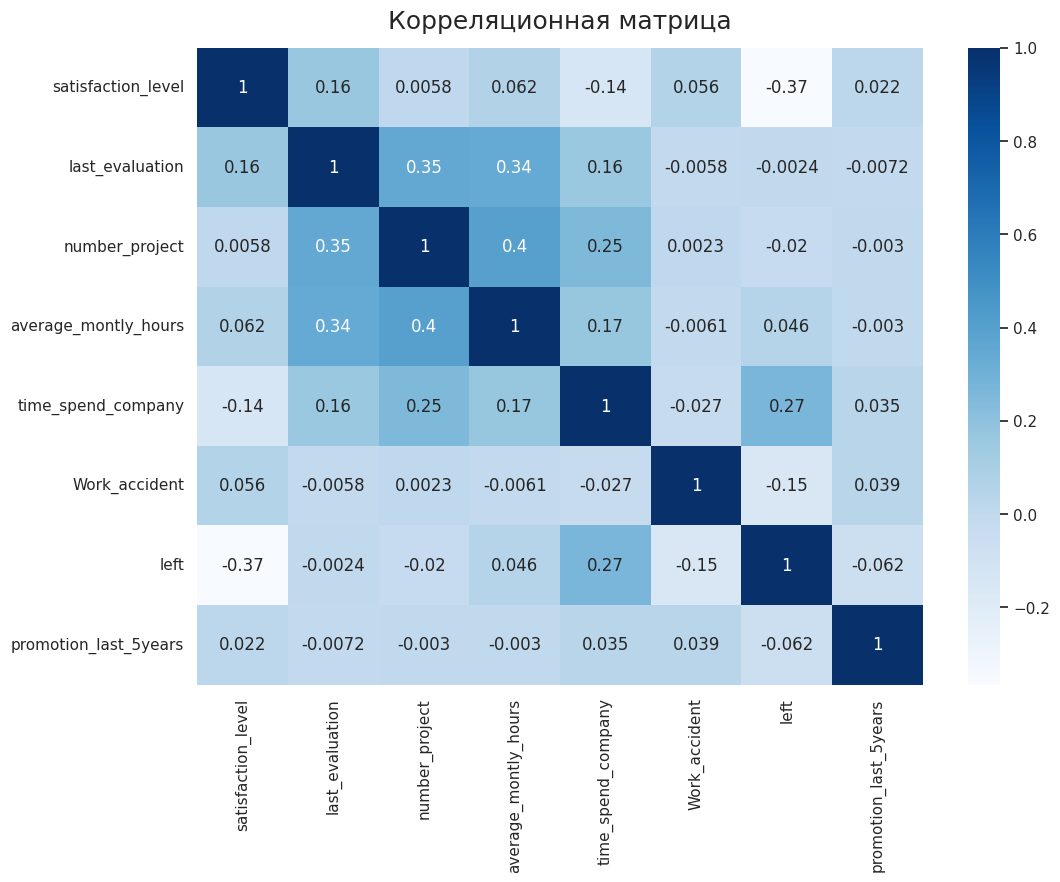

In [10]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
my_map = sns.heatmap(hr_data[hr_data.columns[:8]].corr(method='spearman'), annot=True, cmap = 'Blues')

my_map.set_title('Корреляционная матрица', \
                    fontdict = {'fontsize':18}, pad = 14)

In [ ]:
hr_data['department'].value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

In [ ]:
# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.
hr_data.groupby(['department'])['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

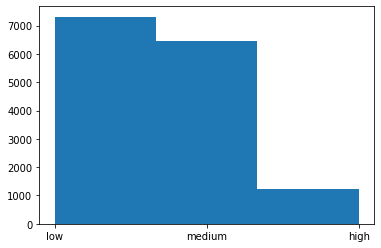

In [ ]:
# 5. Показать распределение сотрудников по зарплатам.
plt.hist(hr_data['salary'], bins=3)
plt.show()

In [ ]:
hr_data['department'].value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

In [ ]:
hr_data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
# hr_data[['department', 'salary']].value_counts()
hr_2 = hr_data[['department', 'salary']]
fr = hr_2.groupby('department')['salary'].value_counts()

fr

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом


H0 -- сотрудники с высоким окладом НЕ проводят на работе больше времени, чем сотрудники с низким окладом

H1 -- сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


In [11]:
hr_7 = hr_data.groupby('salary')[['salary', 'average_montly_hours']]

[Converting Series / SeriesroupBy to DF](https://datatofish.com/convert-pandas-series-to-dataframe/)

In [ ]:
type(hr_7)

pandas.core.groupby.generic.DataFrameGroupBy

[pandas.core.groupby.SeriesGroupBy.transform](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.SeriesGroupBy.transform.html)

In [ ]:
hr_7

In [ ]:
hr_7 = hr_7.transform(lambda x: x)
hr_7
type(hr_7)

pandas.core.frame.DataFrame

In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

data = []

for level in hr_7.salary.unique():
    data.append(
        go.Box(y=hr_7[hr_7.salary==level]['average_montly_hours'],
               name=level)
    )
iplot(data, show_link = False)

# Не могу прикрепить сюда название визуализации(( Не понимаю, как прикрутить сюда метод update_layout


По визуализации не видно, чтоб люди с выским окладом (высокой з/п) больше проводили времени на работе, чем люди с низкой зарплатой или средней.

Единственно: у высокого оклада межквартильный размах менше, чем у других.

Вероятно, это -- начальство, у котрого факторов, влияющих на колебания графика работы, всё же меньше)))

[Статья на Habr. Погружаемся в статистику вместе с Python. Часть 3. Тестов много, принцип один](https://habr.com/ru/post/562380/)

In [ ]:
hr_7.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
print('Нулеая гипотеза:', "=".join(hr_7.salary.unique()))
print('Альтернативная гипотеза:', f'!({"=".join(hr_7.salary.unique())})')

Нулеая гипотеза: low=medium=high
Альтернативная гипотеза: !(low=medium=high)


In [ ]:
low = hr_7.loc[hr_7.salary == 'low']
medium = hr_7.loc[hr_7.salary == 'medium']
high = hr_7.loc[hr_7.salary == 'high']

In [ ]:
stats.f_oneway(low.average_montly_hours, medium.average_montly_hours, high.average_montly_hours)

F_onewayResult(statistic=0.4583624407867663, pvalue=0.6323271153144614)

Значение p-value достаточно высоко, поэтому мы не опровергаем нулевую гипотезу и успокаиваемся, переподтвердив нашу визуализацию

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [ ]:
left = hr_data.loc[hr_data.left == 1]
stay = hr_data.loc[hr_data.left == 0]

In [ ]:
# Доля сотрудников с повышением за последние 5 лет
print('Доля продвижения среди уволившихся: ', len(left.loc[left.promotion_last_5years == 1])/len(left))
print('Доля продвижения среди оставшихся в компании: ', len(stay.loc[stay.promotion_last_5years == 1])/len(stay))

Доля продвижения среди уволившихся:  0.005320638476617194
Доля продвижения среди оставшихся в компании:  0.026251312565628283


In [ ]:
# Средняя степень удовлетворенности
print(left.satisfaction_level.mean())
print(stay.satisfaction_level.mean())
print('-------------------------')
print(hr_data.satisfaction_level.mean())

0.4400980117614114
0.666809590479524
-------------------------
0.6128335222348156


In [ ]:
# Среднее количество проектов
print(left.number_project.mean())
print(stay.number_project.mean())

3.8555026603192384
3.786664333216661


В этой компании продвижения по службе -- редкое явление.
Вероятно, люди и увольнялись по этой причине.

Удовлетворенность работой даже у тех, кто остался, не очень высок, очень близок со средним по всей компании, который тоже не может похвастаться высоким значением. А у тех, кто уволился, ещё меньше.

Среднее количество проектов у уволившихся немногим больше. Наверное, народ уходил на более приемлимые условия (туда, где быстрее оценивают и продвигают и/или уровень удовлетворенности повыше)


На мой не искушенный взгляд, у компании может возникнуть каадровый дефицит.

Если компания занимается рутиной, то почему проекты??
А если есть проекты -- что обычно у компаний, которые непрерывно развиваются и расширяют свой рынок -- то почему не продвигаются люди???




9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [ ]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
hr_9 = hr_data.copy()

In [ ]:
# columns = ['department', 'salary']
# hr_9 = hr_9.drop(columns, inplace=True, axis=1)

hr_9 = hr_9.drop(hr_9.columns[[-1, -2]], axis=1)
hr_9

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [ ]:
is_left = hr_9.left
is_left

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
data = hr_9.drop(hr_9.columns[[-2]], axis=1)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, is_left, test_size=0.25, random_state=42)

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке


array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
         4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
        -1.10730495e+00]])

##Итого:
Моя модель слабо предсказывает.

В очередной раз видно, что уровень удовлетворенности оказывает решающий фактор на увольнение сотрудников

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Print the evaluation metrics for the dataset.
print(classification_report(y_test, lda.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2853
           1       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750



In [ ]:
cfm = confusion_matrix(y_test, lda.predict(X_test))
cfm

array([[2605,  248],
       [ 676,  221]])

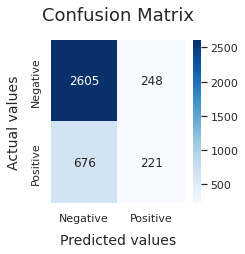

In [ ]:
# Compute and plot the Confusion matrix
cfm = confusion_matrix(y_test, lda.predict(X_test))
categories  = ['Negative','Positive']

sns.heatmap(cfm, annot = True, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
sns.set(rc={'figure.figsize':(3, 2)})

* 2605 -- модель правильно предсказала тех сотрудников,которые НЕ уволились и остались

* 248 -- модель ошибочно предсказала, что уволятся, а в реальности сотрудники остались

* 678 -- модель ошибочно предсказала, что сотрудники останутся, а в реальности они уволились

* 221 -- верно предсказанные увольнения (модель предсказала -- они уволились)

In [ ]:
# показатель Precision (точность)
# (т.е. какая доля результатов была предсказана верно;
# т.е. доля объектов, названных моделью положительными и при этом действительно
# являющихся положительными):

Precision = TP / (TP + FP)